In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-74.54390155464567 59.23079614966133
-32.169456283755636 -52.541349239491495
47.37502927520356 55.612974321379795
54.074229019015775 154.7118922347954
-35.83314868840281 -113.21485883268913
-60.56506545872317 -115.0885143310366
-46.78272497049426 101.70996014350192
-56.49874815946986 -78.12645120803104
14.92751722267748 -102.16091749482597
-46.12490628318077 -88.53731146846323
-31.038597105157216 73.58040310786444
9.519252911608987 23.508292972518603
87.95494021846056 -47.73709807838716
-78.77674603585268 -153.22092409752284
10.831886922773592 24.938563302015268
-36.7713268643905 108.20650055833289
79.2430566201113 54.328121464035576
-36.4171092835425 -59.76681375288449
-82.0863919103574 81.0424084064806
-48.659183494271865 27.292799156830768
2.7985376683172376 13.378459072042062
9.262028119213426 -33.32209289383866
50.02380981290082 -167.5307257501034
59.44500204078622 130.49718861035615
-21.97652768227364 -79.60814947425492
-47.33689198833189 -168.71762235270612
64.91187982926738 154

In [6]:
# Use the citipy module to determine city based on latitude and long
from citipy import citipy

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
pelotas br
shubarkuduk kz
sobolevo ru
rikitea pf
rikitea pf
busselton au
punta arenas cl
petatlan mx
castro cl
bambous virieux mu
birao cf
upernavik gl
mataura pf
birao cf
busselton au
belushya guba ru
azul ar
busselton au
port elizabeth za
abong mbang cm
sao filipe cv
bethel us
chagda ru
marcona pe
vaini to
srednekolymsk ru
avarua ck
ushuaia ar
mar del plata ar
ushuaia ar
araouane ml
mataura pf
nemuro jp
lebu cl
hokitika nz
lagoa pt
la serena cl
nikolskoye ru
halifax ca
lazaro cardenas mx
nikolskoye ru
upernavik gl
arawa pg
itarema br
miles city us
grand centre ca
labutta mm
wulanhaote cn
bethel us
bengkulu id
vaitupu wf
necochea ar
port alfred za
ushuaia ar
port elizabeth za
lorengau pg
lethem gy
arman ru
hami cn
iqaluit ca
talnakh ru
saint-philippe re
mahebourg mu
rikitea pf
husavik is
samusu ws
charcas mx
barentsburg sj
norman wells ca
cockburn town bs
narsaq gl
coffs harbour au
upernavik gl
yellowknife ca
albany au
attawapiskat ca
busselton au
kapaa us
waw sd
bredasdo

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
        

611

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [30]:
# Loop through all the cities in the list.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | pelotas
Processing Record 3 of Set 1 | shubarkuduk
Processing Record 4 of Set 1 | sobolevo
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | petatlan
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | birao
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | azul
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | abong mbang
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | chagda
City not found. Skipping...
Processing Record 21 of Set 

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pelotas,-31.7719,-52.3425,48.00,94,3,2.98,BR,2022-07-01 02:18:25
1,Shubarkuduk,49.1447,56.4872,60.85,52,8,2.93,KZ,2022-07-01 02:18:25
2,Sobolevo,54.4299,31.8996,56.88,79,0,3.58,RU,2022-07-01 02:18:26
3,Rikitea,-23.1203,-134.9692,68.70,86,100,17.56,PF,2022-07-01 02:18:26
4,Busselton,-33.6500,115.3333,54.34,69,0,4.99,AU,2022-07-01 02:18:27
5,Punta Arenas,-53.1500,-70.9167,26.71,93,20,5.75,CL,2022-07-01 02:18:27
6,Petatlan,17.5167,-101.2667,79.50,86,97,3.85,MX,2022-07-01 02:18:28
7,Castro,-24.7911,-50.0119,47.46,65,0,2.04,BR,2022-07-01 02:18:29
8,Bambous Virieux,-20.3428,57.7575,68.25,83,40,10.36,MU,2022-07-01 02:18:29
9,Birao,10.2849,22.7882,73.90,83,94,3.76,CF,2022-07-01 02:24:37


In [56]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pelotas,BR,2022-07-01 02:18:25,-31.7719,-52.3425,48.00,94,3,2.98
1,Shubarkuduk,KZ,2022-07-01 02:18:25,49.1447,56.4872,60.85,52,8,2.93
2,Sobolevo,RU,2022-07-01 02:18:26,54.4299,31.8996,56.88,79,0,3.58
3,Rikitea,PF,2022-07-01 02:18:26,-23.1203,-134.9692,68.70,86,100,17.56
4,Busselton,AU,2022-07-01 02:18:27,-33.6500,115.3333,54.34,69,0,4.99


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [61]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656648139.4505956

In [62]:
today = time.strftime("%x")
today

'06/30/22'

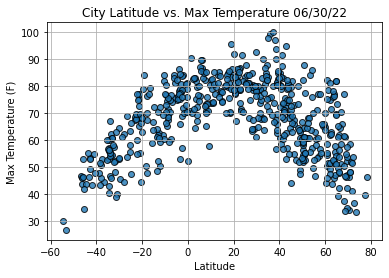

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

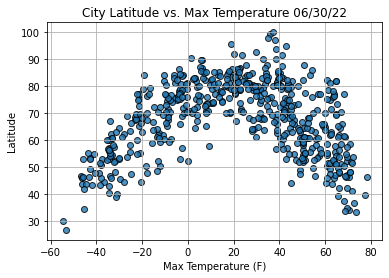

In [65]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

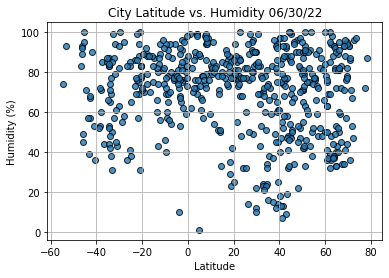

In [66]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

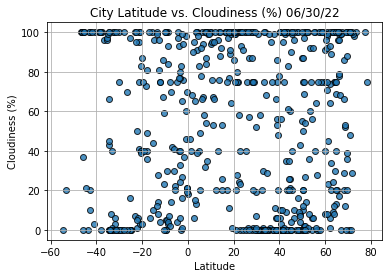

In [67]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

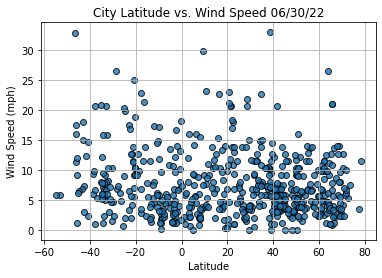

In [68]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [77]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [78]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2022-07-01 02:24:39
Lat                       -33.918
Lng                       25.5701
Max Temp                    46.69
Humidity                       71
Cloudiness                      0
Wind Speed                    2.3
Name: 13, dtype: object

In [79]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
555     True
556     True
557     True
558    False
559     True
Name: Lat, Length: 560, dtype: bool

In [81]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Shubarkuduk,KZ,2022-07-01 02:18:25,49.1447,56.4872,60.85,52,8,2.93
2,Sobolevo,RU,2022-07-01 02:18:26,54.4299,31.8996,56.88,79,0,3.58
6,Petatlan,MX,2022-07-01 02:18:28,17.5167,-101.2667,79.50,86,97,3.85
9,Birao,CF,2022-07-01 02:24:37,10.2849,22.7882,73.90,83,94,3.76
10,Upernavik,GL,2022-07-01 02:24:37,72.7868,-56.1549,36.77,96,98,5.41


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

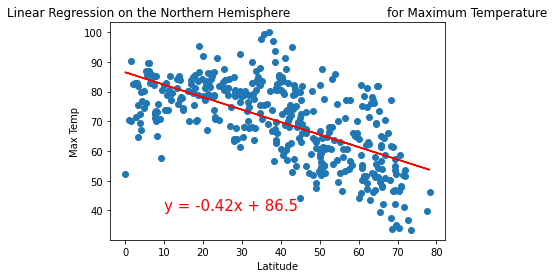

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

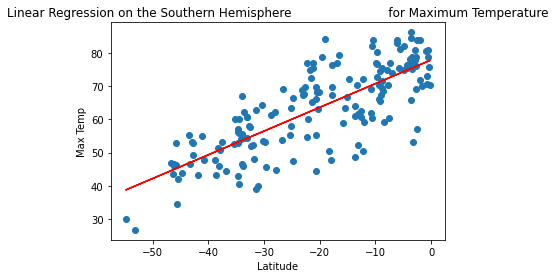

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

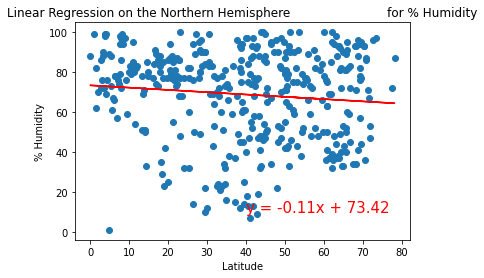

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

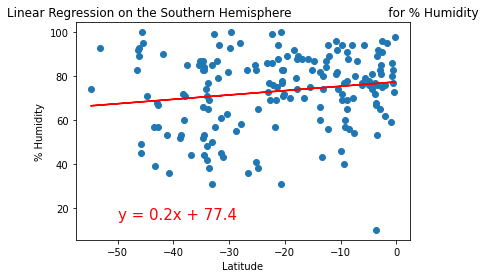

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

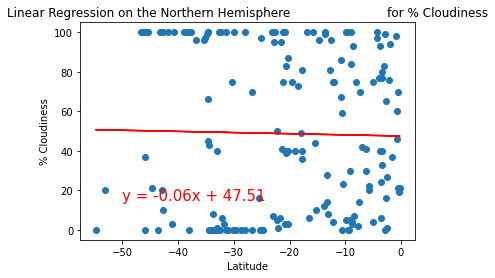

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

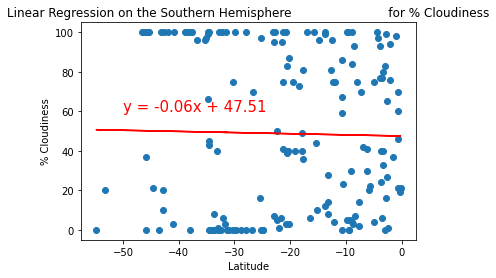

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

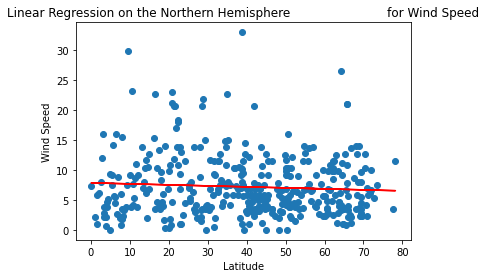

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

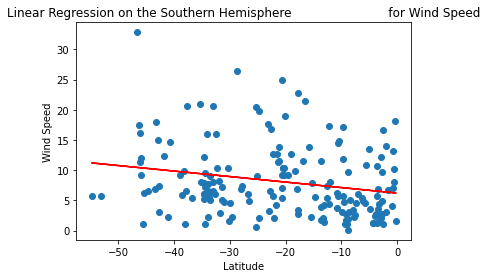

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))